# Статистический анализ данных сервиса аренды самокатов

Имеются данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. 

**Цель исследования:** Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Ход исследования:**
Данные получим из датасетов `/datasets/users_go.csv`, `/datasets/rides_go.csv`, `/datasets/subscriptions_go.csv`. Необходимо провести обзор данных перед исследованием, так как о качестве данных ничего не известно. Затем проверим данные на ошибки, оценим их влияние на исследование. На этапе предобработки исправим ошибки в данных, которые не приведут к искажению конечного результата, если они будут. 

Таким образом, исследование пройдет в 6 этапов:
- Постановка задачи
- Получение данных
- Обзор данных
- Предобработка данных: 
 - Обработка типов данных
 - Обработка пропусков
 - Устранение дубликатов
 - Добавление новых столбцов
- Исследовательский анализ данных:
 - Построение графиков
 - Анализ частоты встречаемости городов
 - Анализ соотношения пользователей с подпиской и без
 - Анализ возраста пользователей
 - Анализ расстояния, которое пользователь преодолевает за поездку
 - Анализ продолжительности поездок
- Объединение данных
 - Создание аггрегированного датафрейма по 3 исходным датасетам
 - Создание отдельных датафреймов для пользователей с подпиской и без
 - Визуализация информации о расстоянии и времени поездок для пользователей с подпиской и без
- Подсчет выручки
 - Вычислим помесячную выручку, которую принёс каждый пользователь
- Проверка гипотез
 - Тратят ли пользователи с подпиской больше времени на поездки
 - Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката
 - Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
- Распределения
- Оформление результатов и выводов


**Описание данных:**
В основных данных есть информация о пользователях, их поездках и подписках.
- **Пользователи** — users_go.csv
 - `user_id` - уникальный идентификатор пользователя
 - `name` - имя пользователя
 - `age` - возраст
 - `city` - город
 - `subscription_type` - тип подписки (free, ultra)
- **Поездки** — rides_go.csv
 - `user_id` - уникальный идентификатор пользователя
 - `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
 - `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
 - `date` - дата совершения поездки
- **Подписки** — subscriptions_go.csv
 - `subscription_type` - тип подписки
 - `minute_price` - стоимость одной минуты поездки по данной подписке
 - `start_ride_price` - стоимость начала поездки
 - `subscription_fee` - стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [1]:
#импортируем библиотеку
import pandas as pd 

In [2]:
#прочитаем данные
try:
    users_go = pd.read_csv('/Users/margarita/Desktop/datasets/users_go.csv', sep=',')
    rides_go = pd.read_csv('/Users/margarita/Desktop/datasets/rides_go.csv', sep=',')
    subscriptions_go = pd.read_csv('/Users/margarita/Desktop/datasets/subscriptions_go.csv', sep=',')
except:
    users_go = pd.read_csv('/datasets/users_go.csv', sep=',')
    rides_go = pd.read_csv('/datasets/rides_go.csv', sep=',')
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

##### Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [3]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


#### Шаг 2. Предобработка данных

##### Приведем столбец `date` к типу даты pandas.

In [9]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

##### Создадим новый столбец с номером месяца на основе столбца date.

In [10]:
rides_go['month'] = rides_go['date'].dt.month

##### Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [11]:
#проверим датасеты на наличие явных дубликатов
users_go.duplicated().sum()

31

In [12]:
rides_go.duplicated().sum()

0

In [13]:
#удалим явные дубликаты, выполним проверку
users_go = users_go.drop_duplicates().reset_index(drop=True)
users_go.duplicated().sum()

0

In [14]:
#проверим датасеты на наличие неявных дубликатов там, где это возможно
users_go['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [15]:
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты не обнаружены.

In [16]:
#проверим датасеты на наличие пропусков
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропуски не обнаружены.

In [18]:
rides_go.describe()

,user_id,distance,duration,date,month
count,18068.000000,18068.000000,18068.000000,18068,18068.000000
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296,6.486772
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00,4.000000
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00,6.000000
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00,9.000000
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00,12.000000
std,434.734317,1116.831209,6.091051,NaN,3.437410


In [19]:
users_go.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


**Вывод:** На первый взгляд качество данных довольно хорошее. В данных отсутствуют пропуски и очень мало дубликатов. Дубликаты были обработаны. Тип данных корректный везде, за исключением даты, которая была преобразована к типу даты pandas. На ее основе был создан столбец с номером месяца. Анализ данных с помощью `describe` показал, что выбросы отсутствуют.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

##### Частота встречаемости городов.

In [20]:
#найдем частоту встречаемости каждого города
users_go['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [21]:
#импортируем библиотеку для построения графика
import matplotlib.pyplot as plt

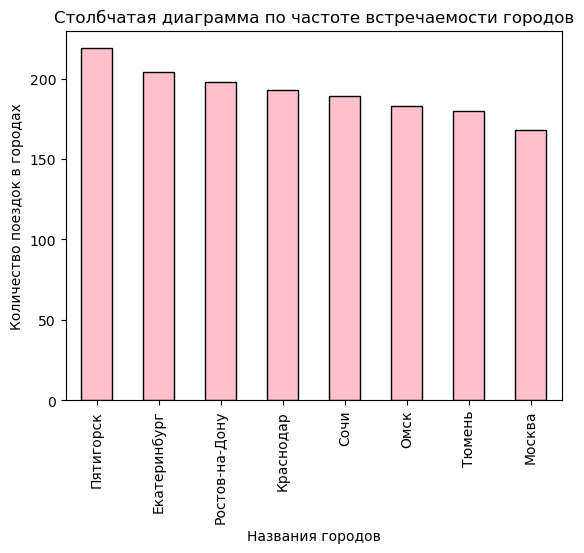

In [22]:
#построим столбчатую диаграмму
users_go['city'].value_counts().plot.bar(color='pink', edgecolor = 'black', title='Столбчатая диаграмма по частоте встречаемости городов')
plt.xlabel('Названия городов')
plt.ylabel('Количество поездок в городах')
plt.show()

**Вывод:** В исследовании участвуют 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар, Пятигорск, Екатеринбург и Сочи. Частоты встречаемости разных городов близки между собой и колеблются около 200 поездок. Наибольшая частота характерна для Пятигорска (219 поездок), а наименьшая - для Москвы (168 поездок).

##### Cоотношение пользователей с подпиской и без подписки.

In [23]:
#найдем количество пользователей по каждому типу подписок
users_go['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [24]:
#найдем соотношение подписок в %
pd.DataFrame(round(users_go['subscription_type'].value_counts()/len(users_go)*100)).style.background_gradient('coolwarm')

,count
subscription_type,
free,54.000000
ultra,46.000000


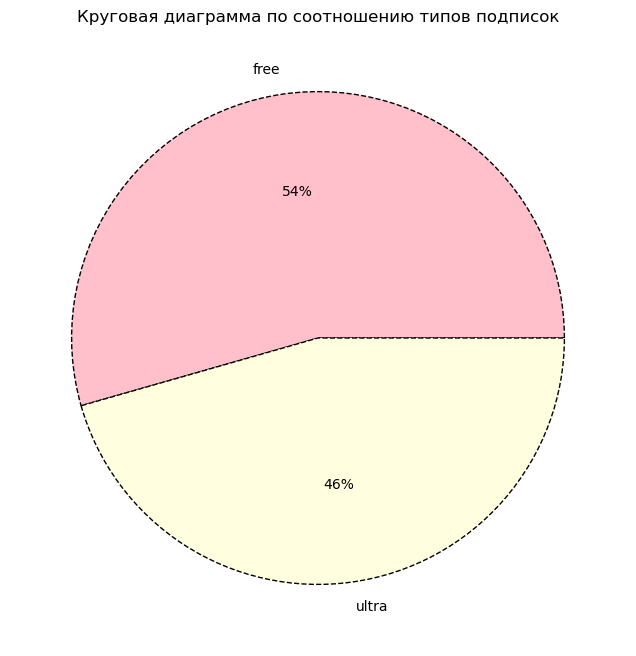

In [25]:
#построим круговую диаграмму
users_go.groupby('subscription_type').size().plot(kind='pie', colors=['pink', 'lightyellow'], subplots=True, figsize=(8, 8), autopct='%1.0f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
plt.title('Круговая диаграмма по соотношению типов подписок')
plt.ylabel('')
plt.show()

**Вывод:** Существует 2 типа подписок: free и ultra. На тип free приходится 54% всех подписок, на тип ultra чуть меньше, а именно 46%. 

##### Возраст пользователей.

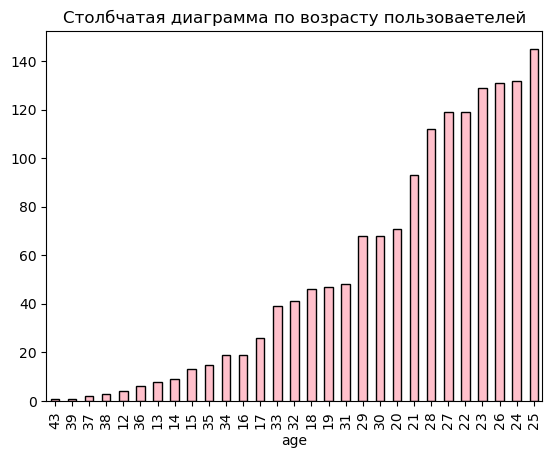

In [26]:
#построим столбчатую диаграмму
users_go['age'].value_counts().sort_values().plot.bar(color='pink', edgecolor = 'black', title='Столбчатая диаграмма по возрасту пользоваетелей')
plt.show()

In [27]:
#посмотрим общую информацию о данных
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [28]:
round(users_go['age'].median())

25

**Вывод:** Возраст пользоваетелей сервиса составляет от 12 до 43 лет. Наибольшее количество пользователей приходится на возраст 25 лет. Медиана выборки также равна 25 лет. Наименьшее количество пользоваетелей приходится на возраст 43 года.

##### Расстояние, которое пользователь преодолел за одну поездку.

In [29]:
#посмотрим общую информацию о данных
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

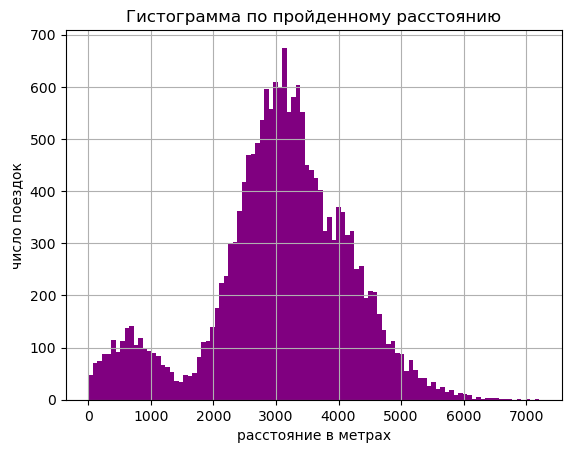

In [30]:
#построим гистограмму
rides_go['distance'].plot(kind='hist', ylabel='число поездок', xlabel='расстояние в метрах', color='purple',  \
                          grid=True, bins=100, title='Гистограмма по пройденному расстоянию')
plt.show()

**Вывод:** По имеющимся данным, дистанция поездки может составлять до 7211 метров. Очень маленькое пройденное расстояние, вероятно, связано с тем, что пользователь передумал передвигаться на самокате и сразу завершил свою поездку. На гистограмме по пройденному расстоянию видны отчетливые пики на наиболее часто встречающихся дистанциях - около 600 и 3000 метров (короткие и длинные поездки). Средняя дистанция поездки составляет 3071 метр.

##### Продолжительность поездок.

In [31]:
#посмотрим общую информацию о данных
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

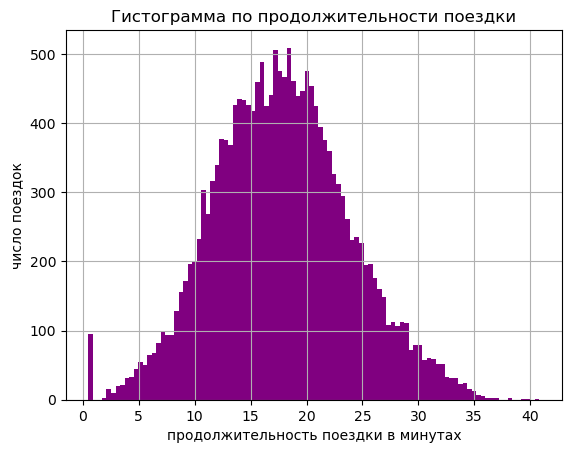

In [32]:
#построим гистограмму
rides_go['duration'].plot(kind='hist', ylabel='число поездок', xlabel='продолжительность поездки в минутах', color='purple', \
                          grid=True, bins=100, title='Гистограмма по продолжительности поездки')
plt.show()

**Вывод:** На гистограмме по продолжительности поездки пик приходится на поездки длительностью от 15 до 20 минут. Средняя продолжительность составляет 18 минут. В целом, продолжительность поездки по имеющимся данным составляет не более 41 минуты.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [33]:
#в датафрейме rides_go добавим информацию о пользователе для каждой поездки, затем добавим информацию о типе подписки
data = rides_go.merge(users_go, on='user_id').merge(subscriptions_go, on='subscription_type')

In [34]:
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


##### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: 
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [36]:
data_free = data.query('subscription_type == "free"')
data_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [37]:
data_ultra = data.query('subscription_type == "ultra"')
data_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [38]:
#импортируем библиотеку
import seaborn as sns
import warnings

#убираем необязательные предупреждения
warnings.filterwarnings('ignore')

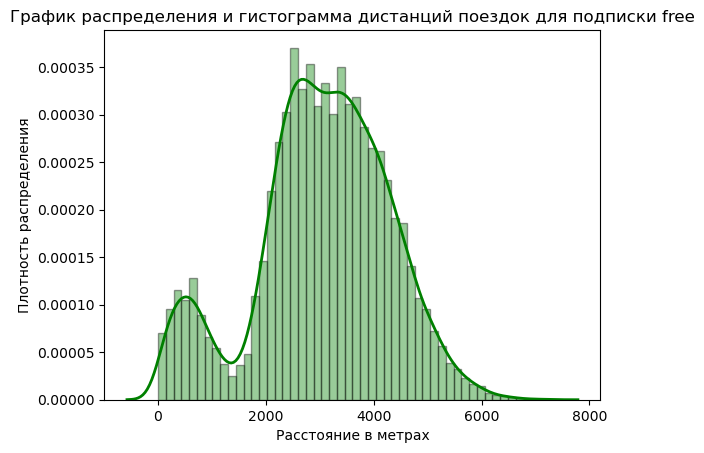

In [39]:
#построим график распределения дистанций поездок для подписки free 
#и соответствующую гистограмму
sns.distplot(data_free['distance'], hist=True, kde=True, 
             bins=50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set (ylabel='Плотность распределения', xlabel='Расстояние в метрах',  title='График распределения и гистограмма дистанций поездок для подписки free') 
plt.show()

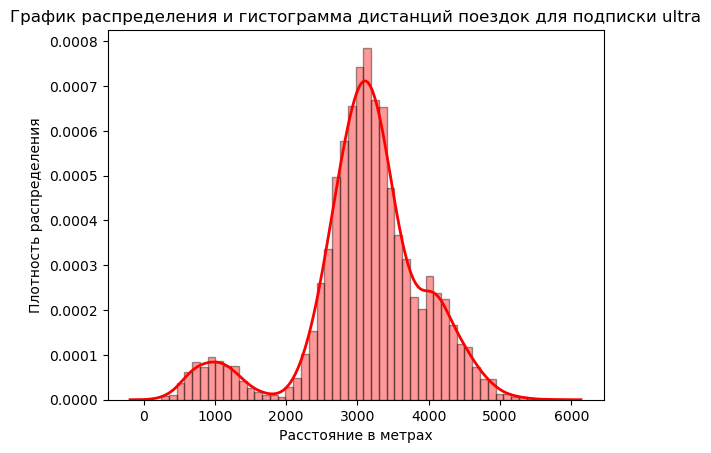

In [40]:
#построим график распределения дистанций поездок для подписки ultra 
#и соответствующую гистограмму
sns.distplot(data_ultra['distance'], hist=True, kde=True, 
             bins=50, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set (ylabel='Плотность распределения', xlabel='Расстояние в метрах',  title='График распределения и гистограмма дистанций поездок для подписки ultra') 
plt.show()

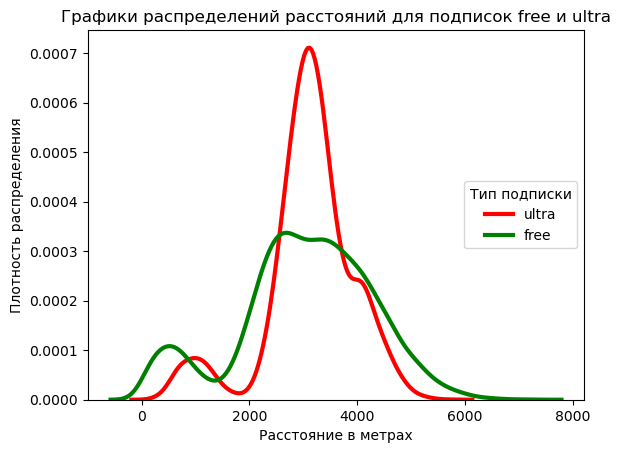

In [41]:
#объединим распределения на один график
color=['red', 'green']
k=0
for subscription_type in data['subscription_type'].unique():
    subset = data[data['subscription_type'] == subscription_type]
    sns.distplot(data[data['subscription_type'] == subscription_type]['distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, color=color[k],
                 label = subscription_type).set(ylabel='Плотность распределения', xlabel='Расстояние в метрах', title='Графики распределений расстояний для подписок free и ultra')
    plt.legend(loc='center right', title='Тип подписки')
    k += 1

**Вывод:** По графикам распределений можно сделать следующие выводы,
- Для подписки ultra основная масса поездок приходится на длинные дистанции (от 2000 до 5000 метров). Таким образом, подписку ultra приобретают пользователи, в основном целенаправленно планирующие ездить на большие расстояния. 
- Для подписки free график плотности распределения имеет менее выраженные пики для поездок на короткие и длинные дистанции, однако они все равно остаются. 

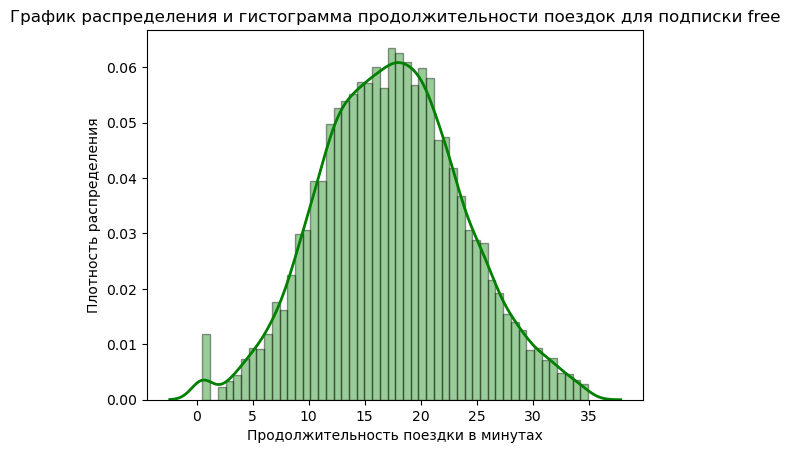

In [42]:
#построим график распределения времени поездок для подписки free 
#и соответствующую гистограмму
sns.distplot(data_free['duration'], hist=True, kde=True, 
             bins=50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set (ylabel='Плотность распределения', xlabel='Продолжительность поездки в минутах',  title='График распределения и гистограмма продолжительности поездок для подписки free') 
plt.show()

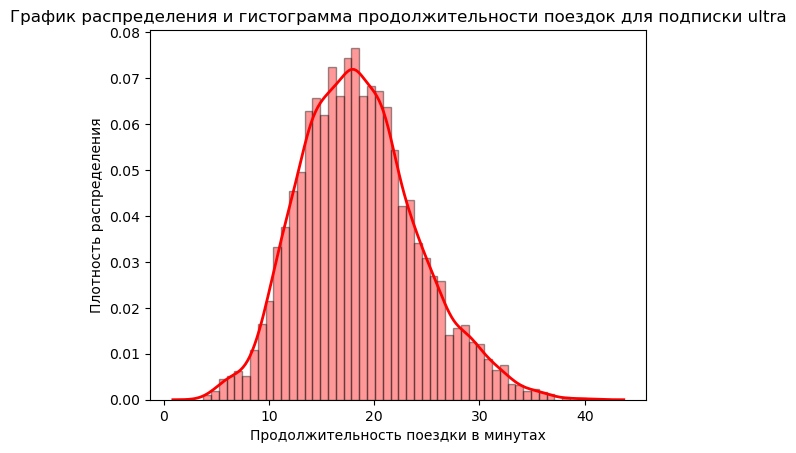

In [43]:
#построим график распределения дистанций поездок для подписки ultra 
#и соответствующую гистограмму
sns.distplot(data_ultra['duration'], hist=True, kde=True, 
             bins=50, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set (ylabel='Плотность распределения', xlabel='Продолжительность поездки в минутах',  title='График распределения и гистограмма продолжительности поездок для подписки ultra') 
plt.show()

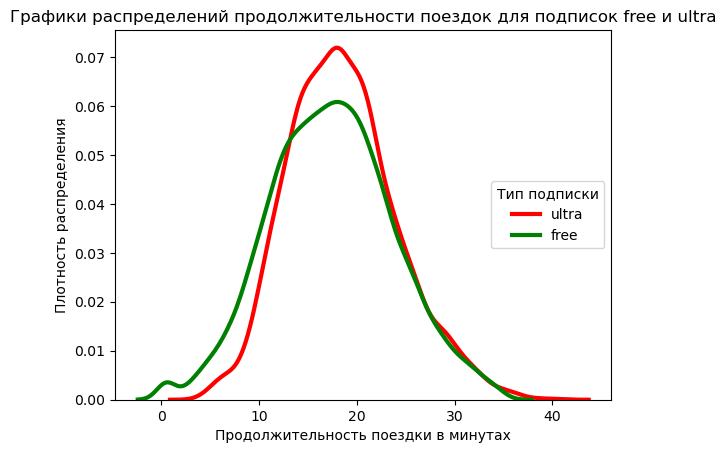

In [44]:
#объединим распределения на один график
color=['red', 'green']
k=0
for subscription_type in data['subscription_type'].unique():
    subset = data[data['subscription_type'] == subscription_type]
    sns.distplot(data[data['subscription_type'] == subscription_type]['duration'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, color=color[k],
                 label = subscription_type).set(ylabel='Плотность распределения', xlabel='Продолжительность поездки в минутах', title='Графики распределений продолжительности поездок для подписок free и ultra')
    plt.legend(loc='center right', title='Тип подписки')
    k += 1

**Вывод:** 
- В части продолжительности поездок похожая картина наблюдается для подписок free и ultra. Пик наблюдается около 19 минут, возле этого значения по продолжительности распределена основная часть поездок. 
- Для подписки типа free наблюдается небольшой пик вблизи нуля, который может быть связан с отказами от поездок новых пользователей, которым не понравился сервис.
- У пользователей с подпиской ultra продолжительность поездки составляет до 40 минут, с подпиской free - до 35 минут.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [45]:
agg_func_describe = {'user_id' : ['count'],
                     'distance' : ['sum'],
                     'duration' : ['sum']}

In [46]:
data_agg = data.groupby(['user_id', 'month', 'subscription_type']).agg(agg_func_describe).round(2).reset_index()
data_agg.columns = [''.join(col).strip() for col in data_agg.columns.values]
data_agg = data_agg.rename(columns={'user_idcount':'user_id_count', 'distancesum':'distance_sum', 'durationsum':'duration_sum', 'pricesum':'price_sum'})
data_agg

,user_id,month,subscription_type,user_id_count,distance_sum,duration_sum
0,1,1,ultra,2,7027.51,41.42
1,1,4,ultra,1,754.16,6.23
2,1,8,ultra,2,6723.47,44.78
3,1,10,ultra,2,5809.91,31.58
4,1,11,ultra,3,7003.50,53.40
...,...,...,...,...,...,...
11326,1534,6,free,2,3409.47,24.81
11327,1534,8,free,2,7622.45,47.21
11328,1534,9,free,1,4928.17,22.56
11329,1534,11,free,4,13350.02,76.34


##### Обновим этот датафрейм и добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 
Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

In [47]:
#импортируем библиотеку
import numpy as np

In [48]:
#каждое значение из столбца duration округляется 
data['duration'] = np.ceil(data['duration']) 

In [49]:
#вычислим сумму каждой поездки без учета стоимости подписки
data['price'] = data['duration'] * data['minute_price'] + data['start_ride_price']
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,price
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199,156.0
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199,96.0
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199,42.0
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199,114.0
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199,162.0


In [50]:
#объединим данные в сводную таблицу по пользователям и месяцам
agg_func_describe = {'user_id' : ['count'],
                     'distance' : ['sum'],
                     'duration' : ['sum'],
                     'price' : ['sum']}
data_agg = data.groupby(['user_id', 'month', 'subscription_type']).agg(agg_func_describe).round(2).reset_index()
data_agg.columns = [''.join(col).strip() for col in data_agg.columns.values]
data_agg = data_agg.rename(columns={'user_idcount':'user_id_count', 'distancesum':'distance_sum', 'durationsum':'duration_sum', 'pricesum':'price_sum'})
data_agg

,user_id,month,subscription_type,user_id_count,distance_sum,duration_sum,price_sum
0,1,1,ultra,2,7027.51,42.0,252.0
1,1,4,ultra,1,754.16,7.0,42.0
2,1,8,ultra,2,6723.47,46.0,276.0
3,1,10,ultra,2,5809.91,32.0,192.0
4,1,11,ultra,3,7003.50,56.0,336.0
...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.47,26.0,308.0
11327,1534,8,free,2,7622.45,48.0,484.0
11328,1534,9,free,1,4928.17,23.0,234.0
11329,1534,11,free,4,13350.02,78.0,824.0


In [51]:
#учтем стоимость подписки для subscription_type = ultra
for user_id in data_agg['user_id'].unique():
    for month in data_agg['month'].unique():
        data_agg.loc[(data_agg['user_id']== user_id) & (data_agg['month']== month) & (data_agg['subscription_type'] == "ultra"), 'price_sum'] += 199

data_agg

,user_id,month,subscription_type,user_id_count,distance_sum,duration_sum,price_sum
0,1,1,ultra,2,7027.51,42.0,451.0
1,1,4,ultra,1,754.16,7.0,241.0
2,1,8,ultra,2,6723.47,46.0,475.0
3,1,10,ultra,2,5809.91,32.0,391.0
4,1,11,ultra,3,7003.50,56.0,535.0
...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.47,26.0,308.0
11327,1534,8,free,2,7622.45,48.0,484.0
11328,1534,9,free,1,4928.17,23.0,234.0
11329,1534,11,free,4,13350.02,78.0,824.0


In [52]:
data_agg.describe()

,user_id,month,user_id_count,distance_sum,duration_sum,price_sum
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,811.061160,6.477539,1.594564,4896.362588,29.186127,342.303504
std,440.350798,3.443928,0.831604,2911.516554,16.752464,153.875346
min,1.000000,1.000000,1.000000,2.570000,1.000000,58.000000
25%,435.000000,4.000000,1.000000,2972.205000,17.000000,234.000000
50%,843.000000,6.000000,1.000000,3988.720000,24.000000,319.000000
75%,1191.000000,9.000000,2.000000,6421.375000,38.000000,415.000000
max,1534.000000,12.000000,7.000000,23429.490000,143.000000,1444.000000


**Вывод:** Каждый пользователь прошел суммарно расстояние от 2.6 до 23429.5 метров, суммарная помесячная продолжительность поездок для каждого пользователя составляет от 1 до 143 минут, а итоговая ежемесячная сумма, которую принес каждый пользователь, составляет от 58 до 1444 руб.

In [53]:
agg_func_describe2 = {'user_id' : ['count'],
                     'distance' : ['sum'],
                     'duration' : ['sum'],
                     'price' : ['sum'],
                     'subscription_fee' : ['min']}
data_agg2 = data.groupby(['user_id', 'month', 'subscription_type']).agg(agg_func_describe2).round(2).reset_index()
data_agg2.columns = [''.join(col).strip() for col in data_agg2.columns.values]
data_agg2 = data_agg2.rename(columns={'user_idcount':'user_id_count', 'distancesum':'distance_sum', 'durationsum':'duration_sum', 'pricesum':'price_sum', 'subscription_feemin':'subscription_fee'})
data_agg2['price_total'] = data_agg2['price_sum'] + data_agg2['subscription_fee']
data_agg2

,user_id,month,subscription_type,user_id_count,distance_sum,duration_sum,price_sum,subscription_fee,price_total
0,1,1,ultra,2,7027.51,42.0,252.0,199,451.0
1,1,4,ultra,1,754.16,7.0,42.0,199,241.0
2,1,8,ultra,2,6723.47,46.0,276.0,199,475.0
3,1,10,ultra,2,5809.91,32.0,192.0,199,391.0
4,1,11,ultra,3,7003.50,56.0,336.0,199,535.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.47,26.0,308.0,0,308.0
11327,1534,8,free,2,7622.45,48.0,484.0,0,484.0
11328,1534,9,free,1,4928.17,23.0,234.0,0,234.0
11329,1534,11,free,4,13350.02,78.0,824.0,0,824.0


#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Гипотезы:
- H0 - Среднее значение продолжительности поездки пользователей с подпиской такое же, как у пользователей без подписки.
- H1 - Среднее значение продолжительности поездки пользователей с подпиской больше, чем среднее значение продолжительности поездки пользователей без подписки.

Используем уровень статистической значимости 5%.

In [54]:
#импортируем библиотеки
from scipy import stats as st
import numpy as np

In [55]:
#найдем средние для выборок
data_ultra['duration'].mean()

18.54198516280583

In [56]:
data_free['duration'].mean()

17.39090929866399

In [57]:
#задаем уровень статистической значимости
alpha = 0.05

#проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

#проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


**Вывод:** Полученное значение p-value (5.6757813771289775e-37) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в среднем больше времени на поездки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.


Гипотезы:
- H0 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равна 3130 метров.
- H1 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

Используем уровень статистической значимости 5%.

In [58]:
data_ultra['distance'].mean()

3115.4453880370247

In [59]:
goal_value = 3130

#задаем уровень статистической значимости
alpha = 0.05

#проводим ttest, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_1samp(data_ultra['distance'], goal_value, alternative='greater')

print('p-значение:', results.pvalue)

#проверяем p-value
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:** Полученное значение p-value (0.9195368847849785) больше заданного уровня значимости, поэтому нельзя отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской проезжают в среднем не более 3130 метров.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

Гипотезы:
- H0 - Помесячная выручка от пользователей с подпиской по месяцам и от пользователей без подписки равны.
- H1 - Помесячная выручка от пользователей с подпиской по месяцам больше, чем от пользователей без подписки.

Используем уровень статистической значимости 5%.

In [60]:
#задаем уровень статистической значимости
alpha = 0.05

first_group = data_agg.query('subscription_type == "ultra"')['price_sum']
second_group = data_agg.query('subscription_type == "free"')['price_sum']

#проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group, second_group, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

#проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Вывод:** Полученное значение p-value (8.874140893976874e-40) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам больше, чем от пользователей без подписки.

##### Предстаим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае будем сравнивать средние двух зависимых (парных) выборок. 
- Нулевую гипотезу можно сформулировать так: «средние значения совокупностей равны». 
- Альтернативная гипотеза будет сформулирована так: «среднее значение первой генеральной совокупности и среднее значение второй генеральной совокупности не равны». Под первой генеральной совокупностью подразумеваем обращения до обновления.

Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. 

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок, применим метод `scipy.stats.ttest_rel(first_group, second_group)`.
В данном случае:
- `first_group` - данные до обновления 
- `second_group` - данные после обновления

По полученному значение p-value можно сделать вывод, отвергаем нулевую гипотезу или нет. Если p-value окажется меньше заданного уровня значимости, то можно отвергнуть нулевую гипотезу о равенстве средних.

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

In [61]:
#импортируем библиотеку
from scipy.stats import binom

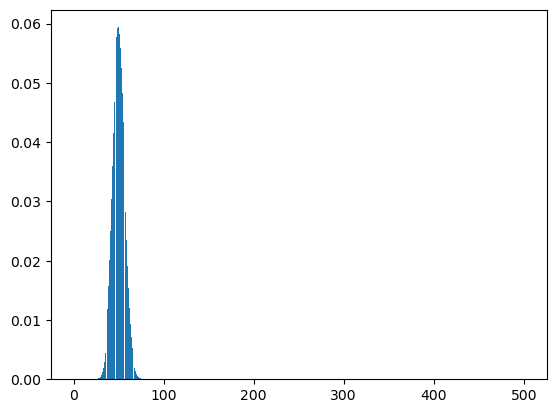

In [62]:
#подберем параметры распределения, описывающие эту ситуацию

#построим график биномиального распределения для n=500 (выбираем n>100, 
#так как минимум 100 существующих клиентов должны продлить эту подписку)
#p=0.01 - вероятность успеха
n=500
p=0.1
distr=[]
for k in range(0,n+1):
    current_value=binom.pmf(k, n, p)
    distr.append(current_value)
plt.bar(range(0,n+1),distr)
plt.show()

График показывает, что при вероятности успеха p, равной 10%, и 500 пользователях вероятность того, что случится больше 80 успехов крайне мала. Увеличим n.

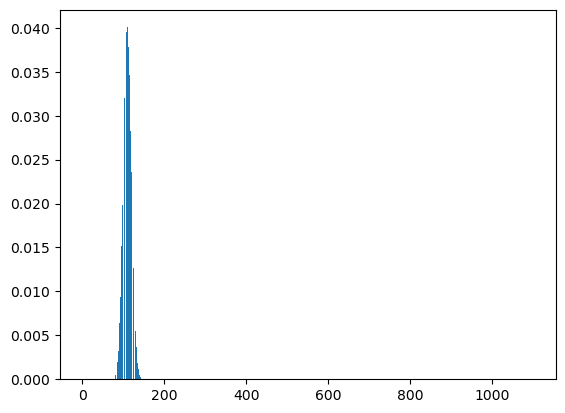

In [63]:
n=1100
p=0.1
distr=[]
for k in range(0,n+1):
    current_value=binom.pmf(k, n, p)
    distr.append(current_value)
plt.bar(range(0,n+1),distr)
plt.show()

График показывает, что при вероятности успеха p, равной 10%, и 1100 пользователях есть вероятность того, что случится больше 100 успехов. Оставим n=1100.

Теперь выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

In [64]:
n=1161
p=0.1

#задаём биномиальное распределение
distr_binom = binom(n, p)

#считаем вероятность хвоста справа от 100
result = 1 - distr_binom.cdf(99)
result

0.9502390990500976

In [65]:
#зададим мат.ожидание и ст.отклонение нормального распределения равными
#мат.ожиданию и ст.отклонению биномиального распределения
#n = 1169
#mu = n * p
#sigma = sqrt(n * p * (1 - p))

#задаём нормальное распределение
#distr_norm = st.norm(mu, sigma) 

#считаем вероятность хвоста справа от 100
#result = 1 - distr_norm.cdf(100)
#print(result)

In [66]:
#Код ревьюера

binom(2, 0.5).cdf(1)

0.75

**Вывод:** Для того, чтобы как минимум 100 существующих клиентов продлило подписку и вероятность выполнить план была около 95% при условии, что после бесплатного пробного периода подписку продлевают 10% пользователей, необходимо разослать минимум 1161 промокод.

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [67]:
#импортируем библиотеку
from scipy.stats import binom, norm
from math import sqrt

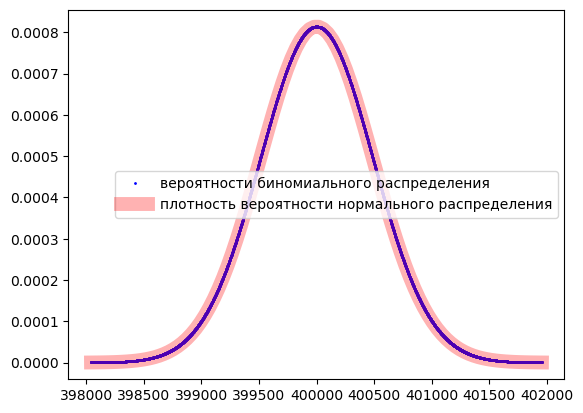

In [68]:
#зададим функцию, которая выдаёт <num> чисел,
#равномерно распределённых от <start> до <stop>
#(понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
#задаём параметры биномиального распределения
n = 1000000
p = 0.4

#границы промежутка, в котором будем строить аппроксимацию -
#от n*p минус 4 ст.отклонения бином.распределения
#до n*p плюс 4 ст.отклонения бином.распределения
#(там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
#зададим набор значений биномиальной величины на выбранном промежутке:
#все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
#рисуем график биномиального распределения
ax = plt.subplot()
#используем синие о-образные маркеры и размер маркера 1
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=1,
          label='вероятности биномиального распределения')

#зададим мат.ожидание и ст.отклонение нормального распределения равными
#мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
#рисуем график нормального распределения:
#получим список из 100 чисел от left до right
x = linspace(left, right, 100)
#используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=10, alpha=0.3, label='плотность вероятности нормального распределения')

#настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()


In [69]:
#задаём нормальное распределение
distr_norm = st.norm(mu, sigma)

#найдем вероятность хвоста слева от 399500
result = distr_norm.cdf(399500)
print(result)

0.15371708296369768


**Вывод:** 
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. При условии, что уведомления открывают около 40 % получивших клиентов, а отдел планирует разослать 1 млн уведомлений, вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, составляет 15.4%.

#### Общий вывод

В данном исследовании был произведен исследовательский и статистический анализ данных популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Были проверены гипотезы, которые могут помочь бизнесу вырасти.

Данные были получены датасетов `/datasets/users_go.csv`, `/datasets/rides_go.csv`, `/datasets/subscriptions_go.csv`. 

Исследование было проведено на 18068 поездках.

**Предобработка данных:**
Качество данных оказалось довольно хорошим. В данных отсутствуют пропуски и очень мало дубликатов. Дубликаты были обработаны. Анализ данных показал, что выбросы отсутствуют.

**Выводы:**

- **Исследовательский анализ данных:**
  - В исследовании участвуют 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар, Пятигорск, Екатеринбург и Сочи. Частоты встречаемости разных городов близки между собой и колеблются около 200 поездок. Наибольшая частота характерна для Пятигорска (219 поездок), а наименьшая - для Москвы (168 поездок).
  - Существует 2 типа подписок: free и ultra. На тип free приходится 54% всех подписок, на тип ultra - 46%.
  - Возраст пользоваетелей сервиса составляет от 12 до 43 лет. Наибольшее количество пользователей приходится на возраст 25 лет. Медиана выборки также равна 25 лет. Наименьшее количество пользоваетелей приходится на возраст 43 года.
  - По имеющимся данным, дистанция поездки может составлять до 7211 метров. Очень маленькое пройденное расстояние, вероятно, связано с тем, что пользователь передумал передвигаться на самокате и сразу завершил свою поездку. Наиболее часто встречаются дистанции около 600 и 3000 метров (короткие и длинные поездки). Средняя дистанция поездки составляет 3071 метр.
  - Длительность основной массы поездок составляет от 15 до 20 минут. Средняя продолжительность составляет 18 минут. В целом, продолжительность поездки по имеющимся данным составляет не более 41 минуты.
- **Подсчет выручки:**
  - Каждый пользователь прошел суммарно расстояние от 2.6 до 23429.5 метров, суммарная помесячная продолжительность поездок для каждого пользователя  составляет от 1 до 143 минут, а итоговая ежемесячная сумма, которую принес каждый пользователь, составляет от 58 до 1444 руб.
- **Проверка гипотез показала, что:**
  - Пользователи с подпиской тратят в среднем больше времени на поездки.
  - Пользователи с подпиской проезжают в среднем не более 3130 метров (3130 метров - оптимальное с точки зрения износа самоката).
  - Помесячная выручка от пользователей с подпиской по месяцам больше, чем от пользователей без подписки.
- **Распределения:**
  - Для того, чтобы как минимум 100 существующих клиентов продлило подписку среди 1161 пользователей и вероятность выполнить план была около 95% при условии, что после бесплатного пробного периода подписку продлевают 10% пользователей, необходимо разослать минимум 1161 промокод.
  - Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. При условии, что уведомления открывают около 40 % получивших клиентов, а отдел планирует разослать 1 млн уведомлений, вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, составляет 15.4%.